# In Class 9: Clustering


### Name: Quentin Smith
### Due Date: March 29th 11:59pm

## 1. Data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#let’s make some data to start
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])
print (df)


     x   y
0   25  79
1   34  51
2   22  53
3   27  78
4   33  59
5   33  74
6   31  73
7   22  57
8   35  69
9   34  75
10  67  51
11  54  32
12  57  40
13  43  47
14  50  53
15  57  36
16  59  35
17  52  58
18  65  59
19  47  50
20  49  25
21  48  20
22  35  14
23  33  12
24  44  20
25  45   5
26  38  29
27  43  27
28  51   8
29  46   7


## 2. Model: 

[[38.         29.        ]
 [32.66666667 74.        ]
 [67.         51.        ]
 [45.5         6.        ]
 [43.         47.        ]
 [57.66666667 37.        ]
 [22.         55.        ]
 [47.         21.66666667]
 [52.         58.        ]
 [33.         59.        ]
 [34.         13.        ]
 [26.         78.5       ]
 [34.         51.        ]
 [65.         59.        ]
 [54.         32.        ]
 [43.         27.        ]
 [48.5        51.5       ]
 [35.         69.        ]
 [51.          8.        ]]


80.0

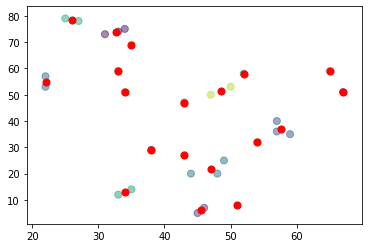

In [ ]:
#first let’s fit s kmeans model based on a ‘k’ that you input yourself
kmeans = KMeans(n_clusters=19).fit(df)

centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)


# inertia on the fitted data
kmeans.inertia_


**Question: Is this good?  Why or why not?  Play with the number of clusters till you find the “ideal” inertia.  Is it better to have a lower or higher inerntia?**

Answer: The inertia I got with five clusters is 1951.20. From the resource below it says the lower the number the better with the ideal number being 0. The higher the number of clusters the closer it gets to 0. The inertia is 0 at 30 because there is only 30 data points and we have clustered each point into their own section. 

Resource: https://scikit-learn.org/stable/modules/clustering.html


In [ ]:
#ok now let’s find the ideal number of clusters (or k) by looking at a silhouette graph

pred = kmeans.fit_predict(df)

from sklearn.metrics import silhouette_score

score = silhouette_score(df, pred, random_state=1)
score



0.4829240712032056

Resource for Silhoute Graph: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Summary: The best value is 1 and the worst is -1. Values near 0 mean overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. 

So the above silhoute graph says that 5 clusters is good but not great.

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(6,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

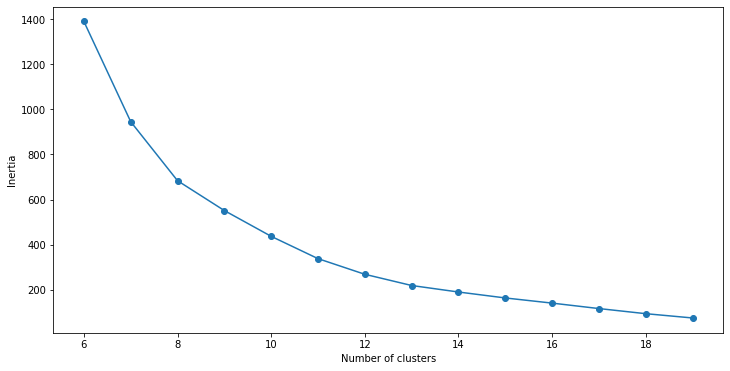

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(6,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


**Question: What are the ideal number of clusters and why?  Check the SSE (Sum of squared errors) and Elbow method**

Answer: Since the Y axis is so large it is hard to tell. I would say the elbow is at 2.7 or so but the inertia is still very high. To deal with this I played around with the graph and changed the range. When you change it to range 6 through 20 we see a little bit more representative of that portion instead of a straight line. I would say that around 8 clusters seems a reasonable guess. From eight on the drop in inertia when adding clusters is less than 100-150. 

Resource: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c


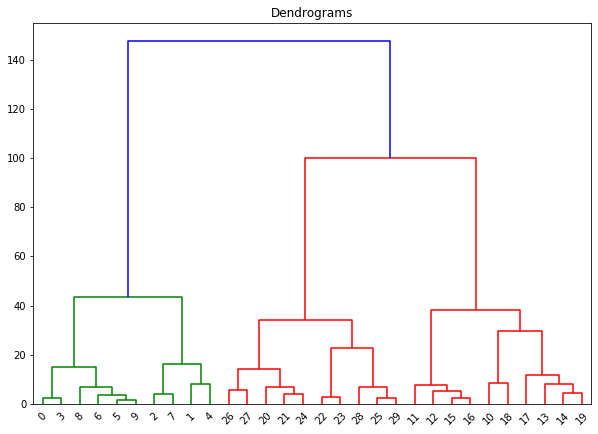

In [ ]:
#OK! Now let’s try another type of clustering algorithm - hierarchical clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))


**Question: How many clusters should we have?**

The resource states that it is a mistake to use dendrograms as a tool for determining the number of clusters in data. But as the graph suggests there are 19 clusters. 

Resource: https://www.displayr.com/what-is-dendrogram/


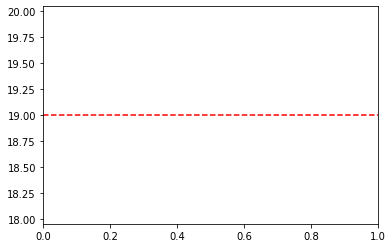

In [ ]:
#using this code insert a value into the y value that you think should have
plt.axhline(y=19, color='r', linestyle='--')

# Not entirely sure what to do with this code.

**Question: What did you learn from this exercise?**

I learned terms associated to clustering such as inertia, silhoute graph, and dendrograms. I learned how they all relate and how to use each tool in deciding the k value or discerning how well my clustering model performed. I learned about dendograms and how heirachy outputs have unseen information like the lengths of the lines or heights of the lines.  

**Question: What is the benefit of kmeans?  What is the downside?**

The kmeans usecase is general purpose, even cluster size, flat geometry, not too many clusters. This fits our generated data.

Some benefits are
- Scales well to large number of samples
- Easy to interpret the clustering results
- Guaranteed convergence
- Easily adapts to new examples
- Fast and efficient (linear time complexity).

Some downsides are 

- Inertia is not a normalized metric and inver high dimensional spaces, the Euclidean distances tend to become inflated (can be solved with PCA)
- Sensitive to outliers
- Hard time with data of varying sizes and densities
- K not known and needs to be found

Resources: https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages


**Question: What is the benefit of hierarchical clustering?  What is the downside?**

Benefits:

- Easy to implement
- Heirarchy output is informative

Downsides:

- Not able to undo previous step
- Time complexity is not suitable for large data
- Intial seed has a strong impact on how it will turn out
- The order of the data has an impact on the final output
- Very sensitive to outliers

Resources: http://santini.se/teaching/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf

## 3. BONUS

In [ ]:
#Mean-Shift Clustering



from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=30)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(df)

ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

14.524008388825298
number of estimated clusters : 5


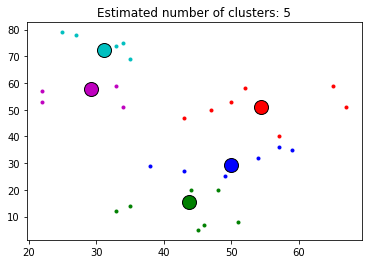

In [ ]:
# Plot result

import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df[my_members, 0], df[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Conclusion:

**Question: Develop a new clustering model to cluster our dataset.  Did you you identify the same number of clusters?**

I used mean-shift clustering. I did not identify the same number of clusters. In mean shift you have to set a bandwidth. The bandwidth for mean-shift clustering is the distance/size scale of the kernal function and there is no bandwidth that works well for every instance. After further research I found that python sklearn offers an estimate_bandwidth function based on nearest- neighbor analysis. 

Using estimate_bandiwidth I get a bandwidth of 14.52 which results in five clusters. There is a graph to show how the clustering took place. 

Types of clustering:
1. Original elbow method (range 1-20) - 5 clusters
2. Elbow Method (range 6-20) - about 8 clusters
3. Hierarchical clustering - 19 clusters
4. Mean-Shift Clustering - 5 clusters


Resources: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html